# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`
$$dQ(w) = d(\frac{1}{\ell}(y - Xw)^T(y - Xw) )$$

$$\frac{1}{\ell}d((y-Xw)^T(y - Xw))  $$


$\frac{1}{\ell}$ пока кикнем, чтобы не мешало
$$ d(y - Xw)^T(y- Xw) + (y-Xw)^Td(y - Xw)$$

$$(dy - d(Xw))^T(y - Xw) + (y - Xw)^T(dy - d(Xw))$$

$$ - d(Xw)^T(y - Xw) + (y - Xw)^T( - d(Xw))$$

$$(y - Xw)^T(-d(Xw)) + (y - Xw)^T(-d(Xw))$$

$$2(y - Xw)^T(-X)$$

$$2X^T(Xw - y)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [1]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

<Axes: xlabel='price', ylabel='Count'>

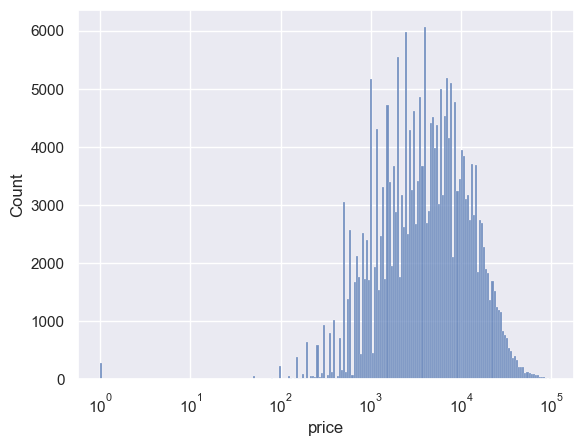

In [10]:
sns.histplot(data = data, x = 'price', log_scale = True)

In [11]:
data = data[data['price'] > data['price'].quantile(0.01)]

<Axes: xlabel='price', ylabel='Count'>

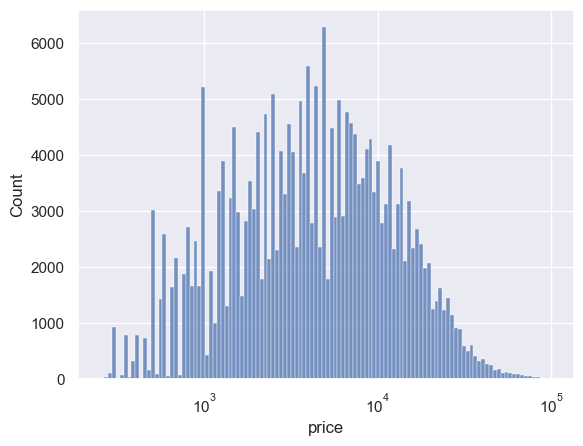

In [12]:
sns.histplot(data = data, x = 'price', log_scale = True)

In [13]:
data['log_price'] = np.log(data['price'] + 1)

In [14]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

<Axes: xlabel='notRepairedDamage', ylabel='log_price'>

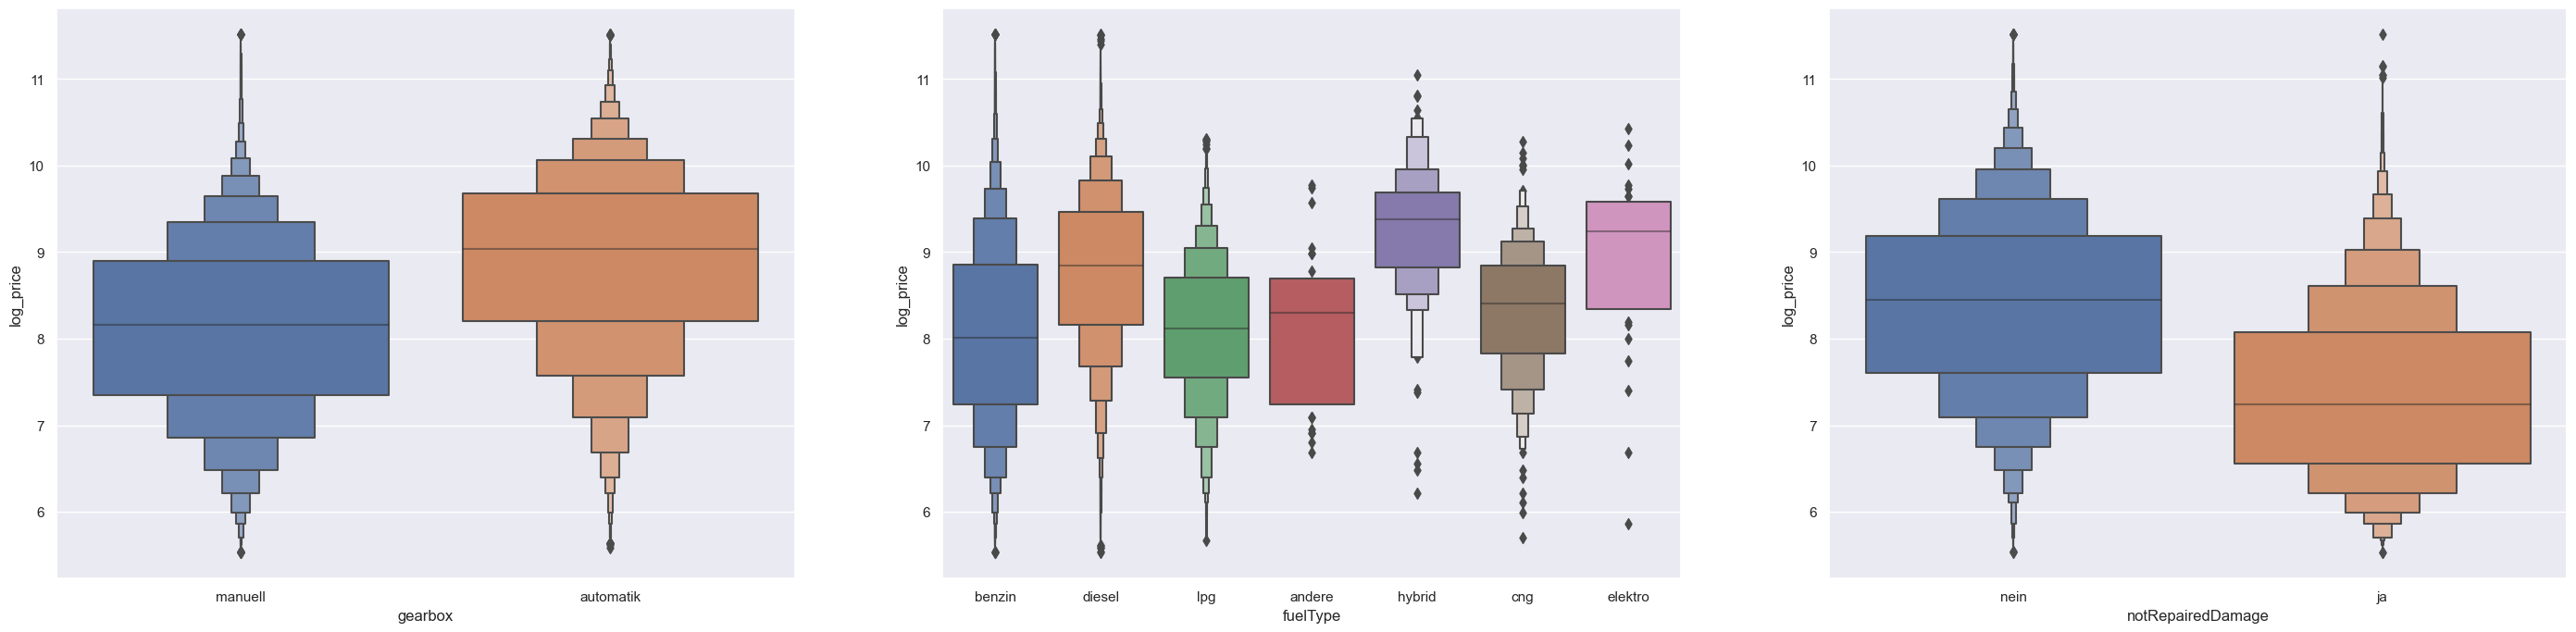

In [15]:
_, (ax1, ax2, ax3) = plt.subplots(ncols= 3, figsize = (35,8))

sns.boxenplot(data,
             x = 'gearbox',
             y = 'log_price',
             ax = ax1)
sns.boxenplot(data,
             x = 'fuelType',
             y = 'log_price',
             ax = ax2)
sns.boxenplot(data,
             x = 'notRepairedDamage',
             y = 'log_price',
             ax = ax3)

<Axes: xlabel='powerPS', ylabel='log_price'>

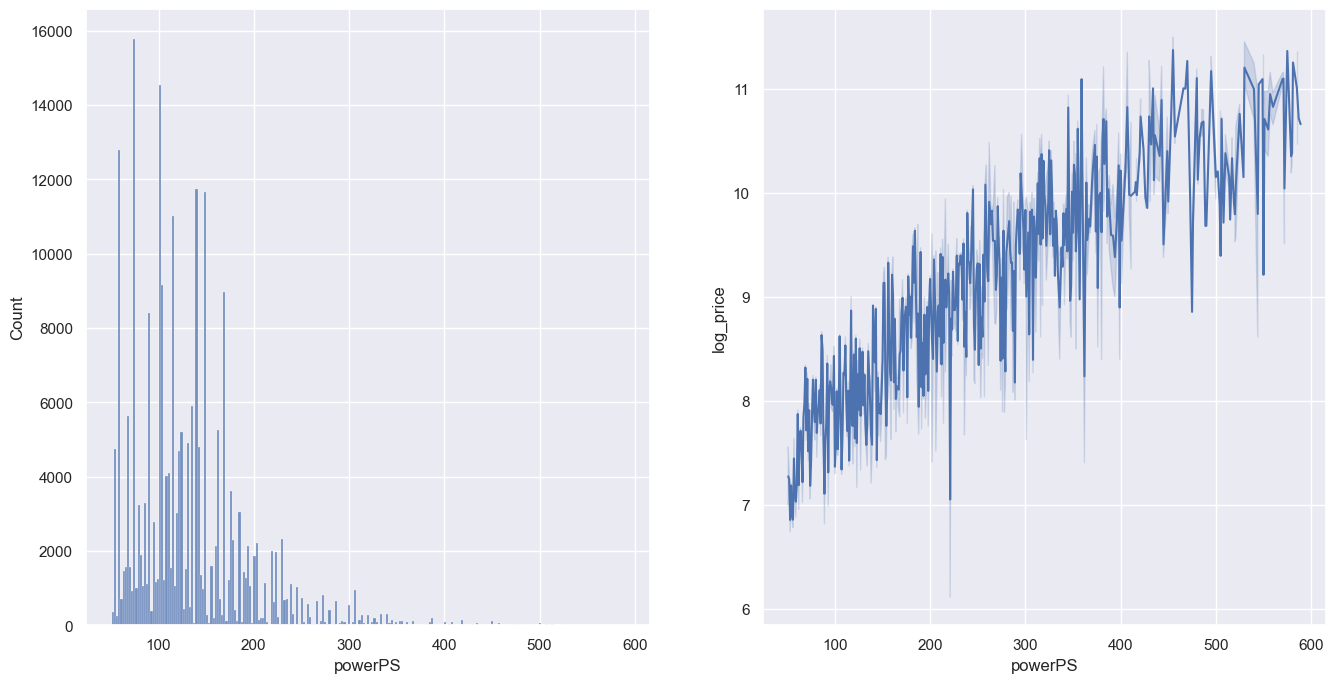

In [16]:
_, (ax1, ax2) = plt.subplots(ncols= 2, figsize = (16,8))

sns.histplot(data, x = 'powerPS', ax = ax1)

sns.lineplot(data, x='powerPS', y = 'log_price', ax=ax2)

In [17]:
data = data[(data['powerPS'] > data['powerPS'].quantile(0.01)) & (data['powerPS'] <401)]

<Axes: xlabel='kilometer', ylabel='log_price'>

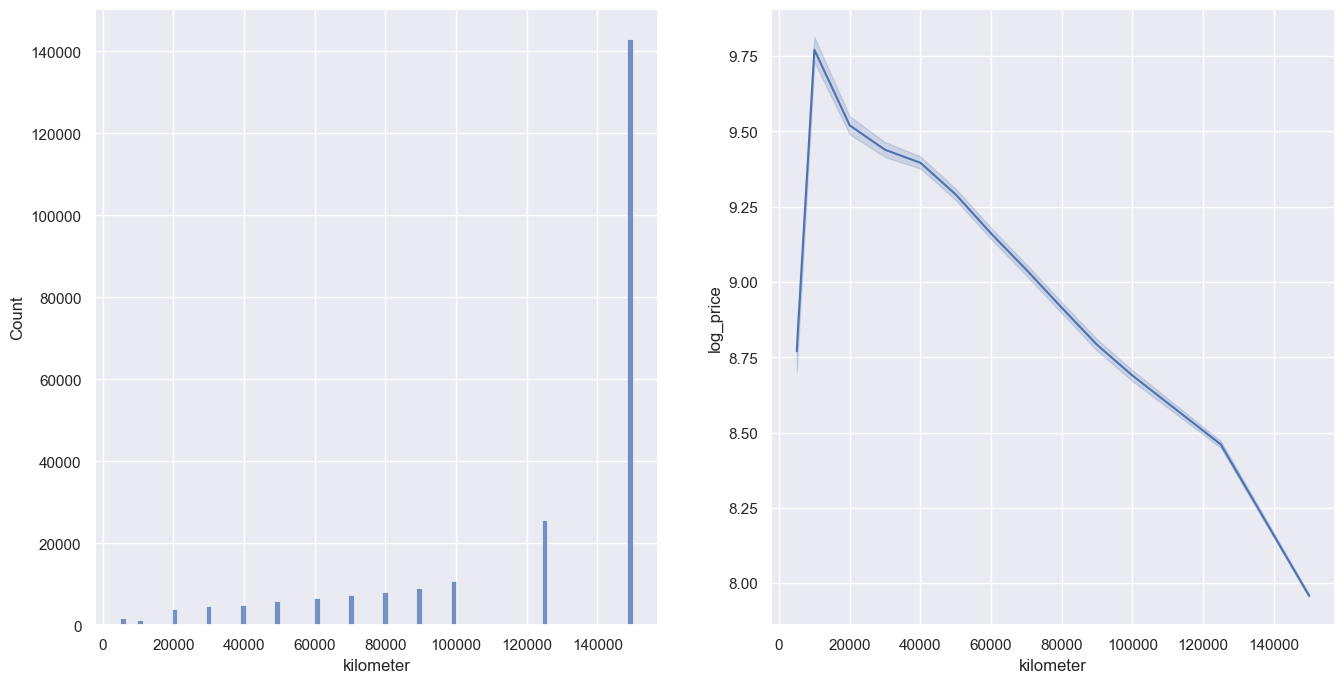

In [18]:
_, (ax1, ax2) = plt.subplots(ncols= 2, figsize = (16,8))

sns.histplot(data, x = 'kilometer', ax = ax1)

sns.lineplot(data, x='kilometer', y = 'log_price', ax=ax2)

<Axes: xlabel='autoAgeMonths', ylabel='log_price'>

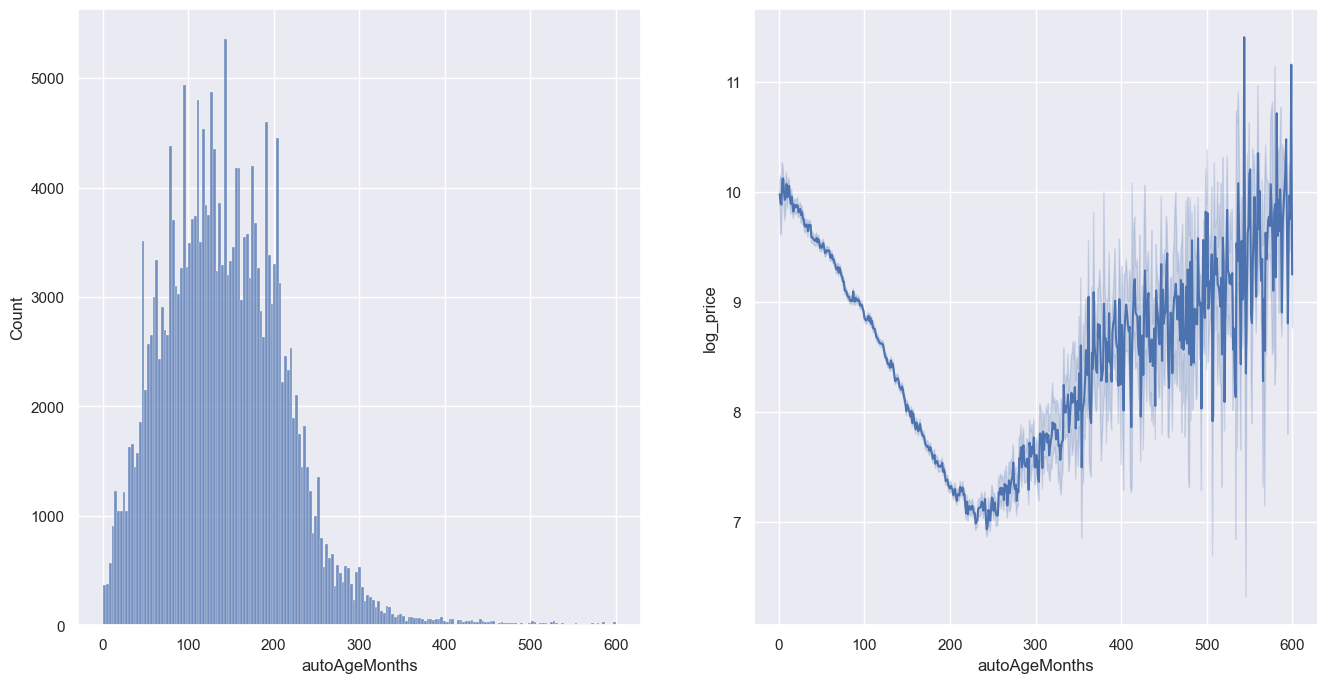

In [19]:
_, (ax1, ax2) = plt.subplots(ncols= 2, figsize = (16, 8))

sns.histplot(data, x = 'autoAgeMonths', ax = ax1)

sns.lineplot(data, x='autoAgeMonths', y = 'log_price', ax=ax2)

In [20]:
data = data[data['autoAgeMonths'] < data['autoAgeMonths'].quantile(0.99)]

<Axes: xlabel='vehicleType', ylabel='log_price'>

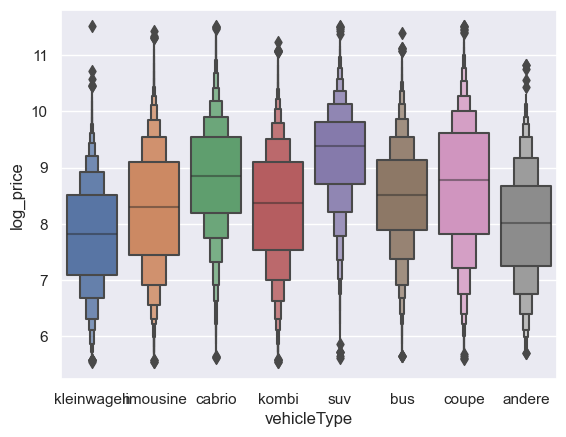

In [21]:
sns.boxenplot(data,
             x = 'vehicleType',
             y = 'log_price',
             )


In [22]:
car_id = (
    data.groupby(['brand', 'model'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    
)
car_id = car_id[car_id['count'] > car_id['count'].quantile(0.2)]
car_id['car_index'] = range(1, len(car_id) + 1)

In [23]:
mapping = car_id.set_index(['brand', 'model'])['car_index']
data['car_index'] = data.set_index(['brand', 'model']).index.map(mapping)

In [24]:
data['car_index'] = data['car_index'].fillna(-1)
data['car_index'] = data['car_index'].astype('int')

In [25]:
categorical = ['brand','model', 'vehicleType','gearbox', 'fuelType', 'notRepairedDamage','car_index']
numeric = ['powerPS', 'kilometer','autoAgeMonths']
other = []


<Axes: xlabel='car_index', ylabel='Count'>

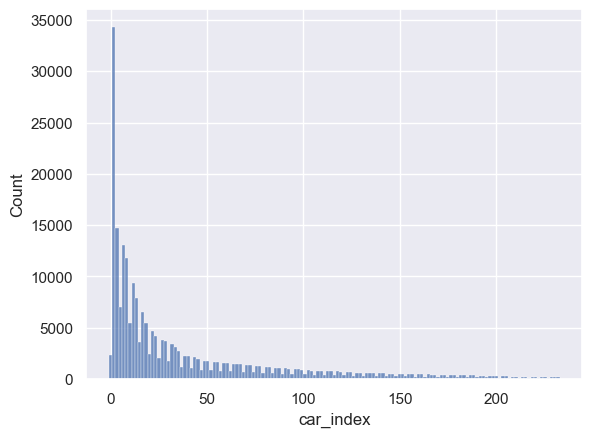

In [26]:
sns.histplot(data = data, x = 'car_index')

In [27]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [28]:
x = x.reset_index(drop=True)

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
train, wait, y_train, y_wait = train_test_split(x, y, test_size=0.2, random_state=10)
test, valid, y_test, y_valid= train_test_split(wait, y_wait, test_size=0.5, random_state=228)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [31]:
from tqdm import tqdm
lamdas = np.logspace(-3, 3, 30)
best_lambdas = {}
mse_errors = []
with tqdm(total=len(lamdas)*len(['full', 'stochastic', 'adam', 'momentum']), position=0, desc="Total progress") as pbar_total:
    for descent_name in ['full','stochastic','adam','momentum']:
        errors = {}
        for lamda in lamdas:
            descent_config = {
                'descent_name': 'brrrrrrrrrrrrr йоууууу',
                'kwargs': {
                    'dimension': train.shape[1],
                    'lambda_' : lamda,
                }
            }
            descent_config['descent_name'] = descent_name
            regression = LinearRegression(
                descent_config=descent_config,
                max_iter= 1000
            )
            regression.fit(valid,y_valid)
            errors[lamda] = regression.loss_history[-1]
            pbar_total.update(1)
        best_lambdas[descent_name] = min(errors, key = errors.get)

        
    
        


    


Total progress: 100%|████████████████████████████████████████████████████████████████| 120/120 [00:34<00:00,  3.44it/s]


In [32]:
best_lambdas_df = pd.DataFrame.from_dict(best_lambdas, orient="index", columns=["Best Lambda"])

best_lambdas_df

,Best Lambda
full,1.268961
stochastic,0.489390
adam,1.268961
momentum,0.788046


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
iteration_to_min = {}
for descent_name in tqdm(['full','stochastic','adam','momentum']):
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': train.shape[1],
                'lambda_' : best_lambdas[descent_name],
            }
        }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter= 1000
    )
    regression.fit(train,y_train)
    print('Метод Gd:', descent_name,"\n",
          f"Ошибка на треине: {mean_squared_error(regression.predict(train),y_train):.4f}", '\n', 
          f'Ошибка на тесте: {mean_squared_error(regression.predict(test),y_test):.4f}', '\n',
          f'R^2 метрика: {r2_score(y_test, regression.predict(test)):.4f}'
         )
    iteration_to_min[descent_name] = regression.count_iter
    

 25%|█████████████████████                                                               | 1/4 [00:00<00:01,  1.61it/s]

Метод Gd: full 
 Ошибка на треине: 0.2620 
 Ошибка на тесте: 0.2582 
 R^2 метрика: 0.7754


 50%|██████████████████████████████████████████                                          | 2/4 [00:01<00:01,  1.94it/s]

Метод Gd: stochastic 
 Ошибка на треине: 0.3193 
 Ошибка на тесте: 0.3225 
 R^2 метрика: 0.7194


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:02<00:00,  1.22it/s]

Метод Gd: adam 
 Ошибка на треине: 0.1820 
 Ошибка на тесте: 0.1809 
 R^2 метрика: 0.8426


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.19it/s]

Метод Gd: momentum 
 Ошибка на треине: 0.1981 
 Ошибка на тесте: 0.1973 
 R^2 метрика: 0.8283


In [34]:
iteration_to_min_df = pd.DataFrame.from_dict(iteration_to_min, orient="index", columns=["iteration to min"])

iteration_to_min_df

,iteration to min
full,57
stochastic,77
adam,111
momentum,110


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

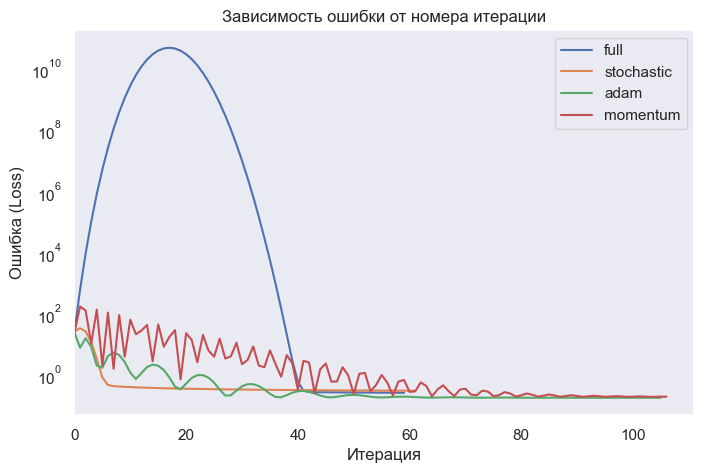

In [35]:
plt.figure(figsize=(8, 5))
for descent_name in ['full','stochastic','adam','momentum']:
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': train.shape[1],
                'lambda_' : best_lambdas[descent_name],
            }
        }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter= 1000
    )
    regression.fit(train,y_train)
    plt.plot(regression.loss_history, label=descent_name)


plt.xlabel("Итерация")
plt.ylabel("Ошибка (Loss)")
plt.title("Зависимость ошибки от номера итерации")
plt.yscale('log')
plt.xlim(0, max(iteration_to_min.values()))
plt.legend()
plt.grid()
plt.show()


## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [36]:
import time
from collections import defaultdict

calc_time = defaultdict(list)
calc_iter = defaultdict(list)
batch_sizes = np.arange(5, 500, 10)
k = 10
for batch_size in tqdm(batch_sizes):
    for i in range(k):
        descent_config = {
                'descent_name': 'stochastic',
                'kwargs': {
                    'dimension': train.shape[1],
                    'lambda_' : best_lambdas['stochastic'],
                    'batch_size': batch_size
                    
                }
            }
        regression = LinearRegression(
            descent_config=descent_config,
            max_iter= 1000
        )
        start_time = time.time()
        regression.fit(train, y_train)
        end_time = time.time()
        calc_time[batch_size].append(end_time - start_time)
        calc_iter[batch_size].append(regression.count_iter)
        
        



100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [05:32<00:00,  6.65s/it]


In [37]:
time_mean = []
for k in calc_time:
    time_mean.append(sum(calc_time[k])/len(calc_time[k]))
iter_mean = []
for k in calc_iter:
    iter_mean.append(sum(calc_iter[k])/len(calc_iter[k]))

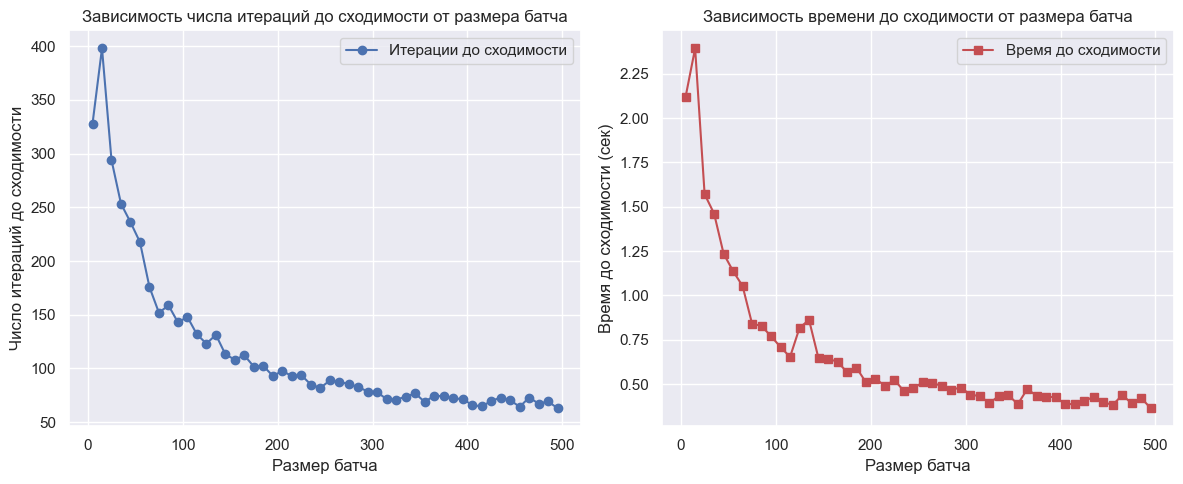

In [38]:
plt.figure(figsize=(12, 5))

# График 1: Количество шагов до сходимости vs Размер батча
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, iter_mean, marker='o', linestyle='-', color='b', label='Итерации до сходимости')
plt.xlabel("Размер батча")
plt.ylabel("Число итераций до сходимости")
plt.title("Зависимость числа итераций до сходимости от размера батча")
plt.grid(True)
plt.legend()

# График 2: Время до сходимости vs Размер батча
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, time_mean, marker='s', linestyle='-', color='r', label='Время до сходимости')
plt.xlabel("Размер батча")
plt.ylabel("Время до сходимости (сек)")
plt.title("Зависимость времени до сходимости от размера батча")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [39]:
lamdas = np.logspace(-3, 1, 20)
mu_values = np.logspace(-6, 0, 15)
best_lambdas_reg = {}
best_mu = {}

# Общий прогресс-бар для всех циклов
with tqdm(total=len(lamdas)*len(mu_values)*len(['full', 'stochastic', 'adam', 'momentum']), position=0, desc="Total progress") as pbar_total:
    for descent_name in ['full', 'stochastic', 'adam', 'momentum']:
        errors = {}
        for lamda in lamdas:
            for mu in mu_values:
                descent_config = {
                    'descent_name': descent_name,
                    'regularized': True,
                    'kwargs': {
                        'dimension': train.shape[1],
                        'lambda_': lamda,
                        'mu': mu
                    }
                }
                regression = LinearRegression(
                    descent_config=descent_config,
                    max_iter=1000
                )
                regression.fit(valid, y_valid)
                errors[(lamda, mu)] = regression.loss_history[-1]
                
                pbar_total.update(1)  # Обновляем общий прогресс

        best_lambdas_reg[descent_name] = min(errors, key=lambda x: errors[x])
        best_mu[descent_name] = best_lambdas_reg[descent_name][1]


Total progress: 100%|██████████████████████████████████████████████████████████████| 1200/1200 [07:42<00:00,  2.60it/s]


In [40]:
best_params_df = pd.DataFrame.from_dict(
    best_lambdas_reg, orient="index", columns=["Best Lambda", "Best Mu"]
)
best_params_df

,Best Lambda,Best Mu
full,1.438450,0.019307
stochastic,0.885867,0.138950
adam,0.885867,0.000001
momentum,1.438450,0.002683


In [41]:
iteration_to_min_reg = {}
for descent_name in (['full','stochastic','adam','momentum']):
    for reg in [False, True]:
        if reg:
            descent_config = {
                    'descent_name': descent_name,
                    'regularized': reg,
                    'kwargs': {
                        'dimension': train.shape[1],
                        'lambda_' : best_lambdas_reg[descent_name][0],
                        'mu': best_lambdas_reg[descent_name][1]
                }
            }
        else:
            descent_config = {
                    'descent_name': descent_name,
                    'regularized': reg,
                    'kwargs': {
                        'dimension': train.shape[1],
                        'lambda_' : best_lambdas_reg[descent_name][0]
                }
            }
        regression = LinearRegression(
            descent_config=descent_config,
            max_iter= 1000
        )
        regression.fit(train,y_train)
        if reg:
            print('Метод Gd:', descent_name,'с регуляризацией',"\n",
                  f"Ошибка на треине: {mean_squared_error(regression.predict(train),y_train):.4f}", '\n', 
                  f'Ошибка на тесте: {mean_squared_error(regression.predict(test),y_test):.4f}', '\n',
                  f'R^2 метрика: {r2_score(y_test, regression.predict(test)):.4f}','\n\n'
                 )
            iteration_to_min[descent_name] = regression.count_iter
        else:
            print('Метод Gd:', descent_name,'без регуляризации',"\n",
                  f"Ошибка на треине: {mean_squared_error(regression.predict(train),y_train):.4f}", '\n', 
                  f'Ошибка на тесте: {mean_squared_error(regression.predict(test),y_test):.4f}', '\n',
                  f'R^2 метрика: {r2_score(y_test, regression.predict(test)):.4f}'
                 )
            iteration_to_min_reg[descent_name] = regression.count_iter

Метод Gd: full без регуляризации 
 Ошибка на треине: 0.2459 
 Ошибка на тесте: 0.2463 
 R^2 метрика: 0.7858
Метод Gd: full с регуляризацией 
 Ошибка на треине: 0.2055 
 Ошибка на тесте: 0.2050 
 R^2 метрика: 0.8216 


Метод Gd: stochastic без регуляризации 
 Ошибка на треине: 0.9075 
 Ошибка на тесте: 0.8746 
 R^2 метрика: 0.2391
Метод Gd: stochastic с регуляризацией 
 Ошибка на треине: 0.2261 
 Ошибка на тесте: 0.2230 
 R^2 метрика: 0.8060 


Метод Gd: adam без регуляризации 
 Ошибка на треине: 0.1821 
 Ошибка на тесте: 0.1812 
 R^2 метрика: 0.8424
Метод Gd: adam с регуляризацией 
 Ошибка на треине: 0.1819 
 Ошибка на тесте: 0.1809 
 R^2 метрика: 0.8426 


Метод Gd: momentum без регуляризации 
 Ошибка на треине: 0.1972 
 Ошибка на тесте: 0.1978 
 R^2 метрика: 0.8279
Метод Gd: momentum с регуляризацией 
 Ошибка на треине: 0.1857 
 Ошибка на тесте: 0.1854 
 R^2 метрика: 0.8387 




In [42]:
print('с регуляризацией', '\n', iteration_to_min_reg)
print('без регуляризации', '\n', iteration_to_min)

с регуляризацией 
 {'full': 57, 'stochastic': 652, 'adam': 104, 'momentum': 179}
без регуляризации 
 {'full': 277, 'stochastic': 255, 'adam': 120, 'momentum': 274}


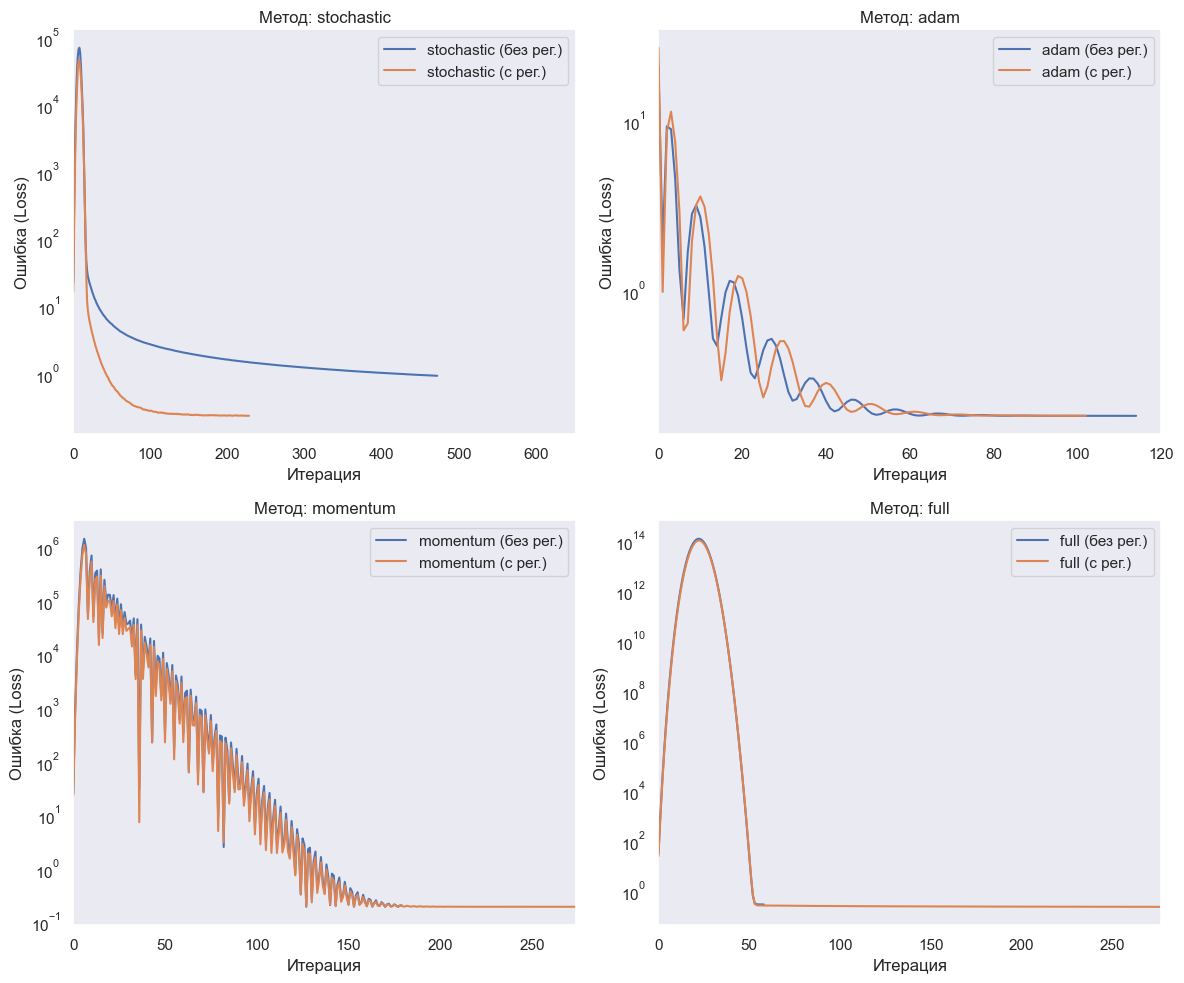

In [43]:
methods = ['stochastic', 'adam', 'momentum', 'full']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  

for i, descent_name in enumerate(methods):
    ax = axes[i // 2, i % 2]  
    
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'dimension': train.shape[1],
            'lambda_': best_lambdas_reg[descent_name][0],
        }
    }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter=1000
    )
    regression.fit(train, y_train)
    ax.plot(regression.loss_history, label=f"{descent_name} (без рег.)")

    descent_config = {
        'descent_name': descent_name,
        'regularized': reg,
        'kwargs': {
            'dimension': train.shape[1],
            'lambda_': best_lambdas_reg[descent_name][0],
            'mu': best_lambdas_reg[descent_name][1]
        }
    }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter=1000
    )
    regression.fit(train, y_train)
    ax.plot(regression.loss_history, label=f"{descent_name} (с рег.)")

    ax.set_xlabel("Итерация")
    ax.set_ylabel("Ошибка (Loss)")
    ax.set_title(f"Метод: {descent_name}")
    ax.set_yscale('log')
    ax.set_xlim(0, max(iteration_to_min_reg[descent_name], iteration_to_min[descent_name]))
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

$$\nabla L(w) = \frac{1}{\ell}d (\log(\cosh(Xw - y)))$$
\
$$d (\log(\cosh(Xw - y))) = \frac{d(\cosh(Xw - y)}{\cosh(Xw - y)}$$

$$\frac{d(\cosh(Xw - y)}{\cosh(Xw - y)} = d(Xw - y) \frac{\sinh(Xw - y)}{\cosh(Xw - y)}$$
\
$$d(Xw - y) \frac{\sinh(Xw - y)}{\cosh(Xw - y)} = X^T \tanh(Xw - y)$$
\
$$ \nabla L(w) = \frac{1}{\ell}X^T \tanh(Xw - y)$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [44]:
from descents import LossFunction
# сначала как и в пятом задании подберем гиперпараметры
lamdas = np.logspace(-3, 3, 30)
best_lambdas = {}
#да, нам все равно, что оптимизируем мы по logcosh, а ошибку считает на mse
with tqdm(total=len(lamdas)*len(['full', 'stochastic', 'adam', 'momentum']), position=0, desc="Total progress") as pbar_total:
    for descent_name in ['full','stochastic','adam','momentum']:
        errors = {}
        for lamda in (lamdas):
            descent_config = {
                'descent_name': descent_name,
                'kwargs': {
                    'dimension': train.shape[1],
                    'lambda_' : lamda,
                    'loss_function': LossFunction.LogCosh
                }
            }
            regression = LinearRegression(
                descent_config=descent_config,
                max_iter= 1000
            )
            regression.fit(valid,y_valid)
            errors[lamda] = regression.loss_history[-1]
            pbar_total.update(1)
        best_lambdas[descent_name] = min(errors, key = errors.get)
        
      

Total progress: 100%|████████████████████████████████████████████████████████████████| 120/120 [01:49<00:00,  1.10it/s]


In [45]:
best_lambdas_df = pd.DataFrame.from_dict(best_lambdas, orient="index", columns=["Best Lambda"])

best_lambdas_df

,Best Lambda
full,13.738238
stochastic,13.738238
adam,22.122163
momentum,13.738238


In [46]:
iteration_to_min_logcosh = {}
for descent_name in tqdm(['full','stochastic','adam','momentum']):
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': train.shape[1],
                'lambda_' : best_lambdas[descent_name],
                'loss_function' : LossFunction.LogCosh
            }
        }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter= 1000
    )
    regression.fit(train,y_train)
    print('Метод Gd:', descent_name,"\n",
          f"Ошибка на треине: {mean_squared_error(regression.predict(train),y_train):.4f}", '\n', 
          f'Ошибка на тесте: {mean_squared_error(regression.predict(test),y_test):.4f}', '\n',
          f'R^2 метрика: {r2_score(y_test, regression.predict(test)):.4f}'
         )
    iteration_to_min_logcosh[descent_name] = regression.count_iter

 25%|█████████████████████                                                               | 1/4 [00:09<00:28,  9.63s/it]

Метод Gd: full 
 Ошибка на треине: 0.2039 
 Ошибка на тесте: 0.2033 
 R^2 метрика: 0.8231


 50%|██████████████████████████████████████████                                          | 2/4 [00:20<00:21, 10.65s/it]

Метод Gd: stochastic 
 Ошибка на треине: 0.1927 
 Ошибка на тесте: 0.1920 
 R^2 метрика: 0.8329


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:24<00:07,  7.61s/it]

Метод Gd: adam 
 Ошибка на треине: 0.1826 
 Ошибка на тесте: 0.1815 
 R^2 метрика: 0.8421


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:36<00:00,  9.12s/it]

Метод Gd: momentum 
 Ошибка на треине: 0.1882 
 Ошибка на тесте: 0.1875 
 R^2 метрика: 0.8369


In [47]:
iteration_to_min_logcosh_df = pd.DataFrame.from_dict(iteration_to_min_logcosh, orient="index", columns=["iteration to min"])

iteration_to_min_logcosh_df

,iteration to min
full,466
stochastic,1000
adam,202
momentum,590


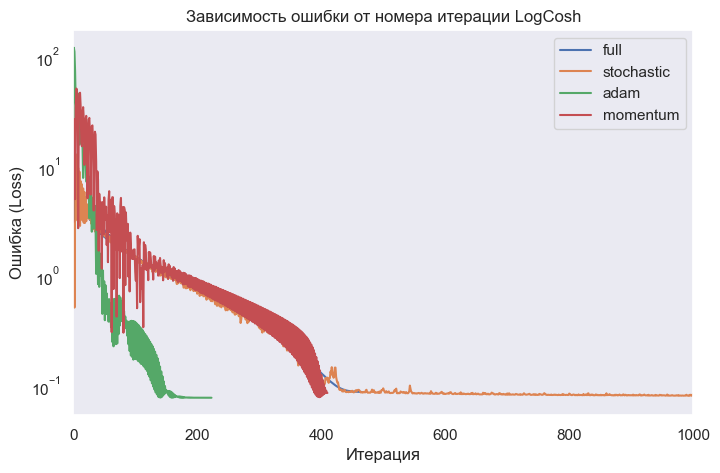

In [48]:
plt.figure(figsize=(8, 5))
for descent_name in ['full','stochastic','adam','momentum']:
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': train.shape[1],
                'lambda_' : best_lambdas[descent_name],
                'loss_function': LossFunction.LogCosh
            }
        }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter= 1000
    )
    regression.fit(train,y_train)
    plt.plot(regression.loss_history, label=descent_name)


plt.xlabel("Итерация")
plt.ylabel("Ошибка (Loss)")
plt.title("Зависимость ошибки от номера итерации LogCosh")
plt.yscale('log')
plt.xlim(0, max(iteration_to_min_logcosh.values()))
plt.legend()
plt.grid()
plt.show()


### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [49]:
#Не вижу смысла сравнивать AMSGrad со всеми, поэтому сравним его с его родителем Adam

from tqdm import tqdm
lamdas = np.logspace(-3, 3, 30)
best_lambdas_for_adam = {}
with tqdm(total=len(lamdas)*len(['adam', 'amsgrad']), position=0, desc="Total progress") as pbar_total:
    for descent_name in ['adam', 'amsgrad']:
        errors = {}
        for lamda in lamdas:
            descent_config = {
                'descent_name': descent_name,
                'kwargs': {
                    'dimension': train.shape[1],
                    'lambda_' : lamda,
                }
            }
            regression = LinearRegression(
                descent_config=descent_config,
                max_iter= 1000
            )
            regression.fit(valid,y_valid)
            errors[lamda] = regression.loss_history[-1]
            pbar_total.update(1)
        best_lambdas_for_adam[descent_name] = min(errors, key = errors.get)

        

Total progress: 100%|██████████████████████████████████████████████████████████████████| 60/60 [00:18<00:00,  3.32it/s]


In [50]:
best_lambdas_for_adam_df = pd.DataFrame.from_dict(best_lambdas_for_adam, orient="index", columns=["Best Lambda"])

best_lambdas_for_adam_df

,Best Lambda
adam,1.268961
amsgrad,0.188739


In [51]:
iteration_to_min_for_adam= {}
for descent_name in tqdm(['adam','amsgrad']):
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': train.shape[1],
                'lambda_' : best_lambdas_for_adam[descent_name],
            }
        }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter= 1000
    )
    regression.fit(train,y_train)
    print('Метод Gd:', descent_name,"\n",
          f"Ошибка на треине: {mean_squared_error(regression.predict(train),y_train):.4f}", '\n', 
          f'Ошибка на тесте: {mean_squared_error(regression.predict(test),y_test):.4f}', '\n',
          f'R^2 метрика: {r2_score(y_test, regression.predict(test)):.4f}'
         )
    iteration_to_min_for_adam[descent_name] = regression.count_iter

 50%|██████████████████████████████████████████                                          | 1/2 [00:01<00:01,  1.14s/it]

Метод Gd: adam 
 Ошибка на треине: 0.1819 
 Ошибка на тесте: 0.1808 
 R^2 метрика: 0.8427


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.15s/it]

Метод Gd: amsgrad 
 Ошибка на треине: 0.1879 
 Ошибка на тесте: 0.1870 
 R^2 метрика: 0.8373


In [52]:
iteration_to_min_for_adam_df = pd.DataFrame.from_dict(iteration_to_min_for_adam, orient="index", columns=["iteration to min"])

iteration_to_min_for_adam_df

,iteration to min
adam,109
amsgrad,109


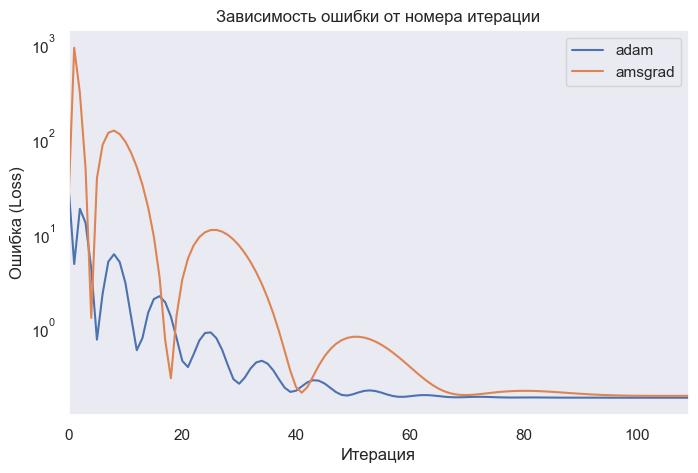

In [53]:
plt.figure(figsize=(8, 5))
for descent_name in ['adam','amsgrad']:
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': train.shape[1],
                'lambda_' : best_lambdas_for_adam[descent_name],
            }
        }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter= 1000
    )
    regression.fit(train,y_train)
    plt.plot(regression.loss_history, label=descent_name)


plt.xlabel("Итерация")
plt.ylabel("Ошибка (Loss)")
plt.title("Зависимость ошибки от номера итерации")
plt.yscale('log')
plt.xlim(0, max(iteration_to_min_for_adam.values()))
plt.legend()
plt.grid()
plt.show()


## Накинем регуляризацию

In [54]:
lamdas = np.logspace(-3, 1, 20)
mu_values = np.logspace(-6, 0, 15)
best_lambdas_reg_adam = {}
best_mu = {}

# Общий прогресс-бар для всех циклов
with tqdm(total=len(lamdas)*len(mu_values)*len(['adam','amsgrad']), position=0, desc="Total progress") as pbar_total:
    for descent_name in ['adam', 'amsgrad']:
        errors = {}
        for lamda in lamdas:
            for mu in mu_values:
                descent_config = {
                    'descent_name': descent_name,
                    'regularized': True,
                    'kwargs': {
                        'dimension': train.shape[1],
                        'lambda_': lamda,
                        'mu': mu
                    }
                }
                regression = LinearRegression(
                    descent_config=descent_config,
                    max_iter=1000
                )
                regression.fit(valid, y_valid)
                errors[(lamda, mu)] = regression.loss_history[-1]
                
                pbar_total.update(1)  # Обновляем общий прогресс

        best_lambdas_reg_adam[descent_name] = min(errors, key=lambda x: errors[x])
        best_mu[descent_name] = best_lambdas_reg_adam[descent_name][1]

Total progress: 100%|████████████████████████████████████████████████████████████████| 600/600 [03:15<00:00,  3.08it/s]


In [55]:
best_params_adam_df = pd.DataFrame.from_dict(
    best_lambdas_reg_adam, orient="index", columns=["Best Lambda", "Best Mu"]
)

best_params_adam_df

,Best Lambda,Best Mu
adam,1.438450,0.000019
amsgrad,0.048329,0.000139


In [56]:
iteration_to_min_reg_adam = {}
iteration_to_min = {}
for descent_name in (['adam','amsgrad']):
    for reg in [False, True]:
        if reg:
            descent_config = {
                    'descent_name': descent_name,
                    'regularized': reg,
                    'kwargs': {
                        'dimension': train.shape[1],
                        'lambda_' : best_lambdas_reg_adam[descent_name][0],
                        'mu': best_lambdas_reg_adam[descent_name][1]
                }
            }
        else:
            descent_config = {
                    'descent_name': descent_name,
                    'regularized': reg,
                    'kwargs': {
                        'dimension': train.shape[1],
                        'lambda_' : best_lambdas_reg_adam[descent_name][0]
                }
            }
        regression = LinearRegression(
            descent_config=descent_config,
            max_iter= 1000
        )
        regression.fit(train,y_train)
        if reg:
            print('Метод Gd:', descent_name,'с регуляризацией',"\n",
                  f"Ошибка на треине: {mean_squared_error(regression.predict(train),y_train):.4f}", '\n', 
                  f'Ошибка на тесте: {mean_squared_error(regression.predict(test),y_test):.4f}', '\n',
                  f'R^2 метрика: {r2_score(y_test, regression.predict(test)):.4f}','\n\n'
                 )
            iteration_to_min[descent_name] = regression.count_iter
        else:
            print('Метод Gd:', descent_name,'без регуляризации',"\n",
                  f"Ошибка на треине: {mean_squared_error(regression.predict(train),y_train):.4f}", '\n', 
                  f'Ошибка на тесте: {mean_squared_error(regression.predict(test),y_test):.4f}', '\n',
                  f'R^2 метрика: {r2_score(y_test, regression.predict(test)):.4f}'
                 )
            iteration_to_min_reg_adam[descent_name] = regression.count_iter

Метод Gd: adam без регуляризации 
 Ошибка на треине: 0.1822 
 Ошибка на тесте: 0.1813 
 R^2 метрика: 0.8423
Метод Gd: adam с регуляризацией 
 Ошибка на треине: 0.1819 
 Ошибка на тесте: 0.1809 
 R^2 метрика: 0.8426 


Метод Gd: amsgrad без регуляризации 
 Ошибка на треине: 0.1879 
 Ошибка на тесте: 0.1872 
 R^2 метрика: 0.8371
Метод Gd: amsgrad с регуляризацией 
 Ошибка на треине: 0.1850 
 Ошибка на тесте: 0.1847 
 R^2 метрика: 0.8393 




In [57]:
print('с регуляризацией', '\n', iteration_to_min_reg_adam)
print('без регуляризации', '\n', iteration_to_min)

с регуляризацией 
 {'adam': 101, 'amsgrad': 71}
без регуляризации 
 {'adam': 248, 'amsgrad': 105}


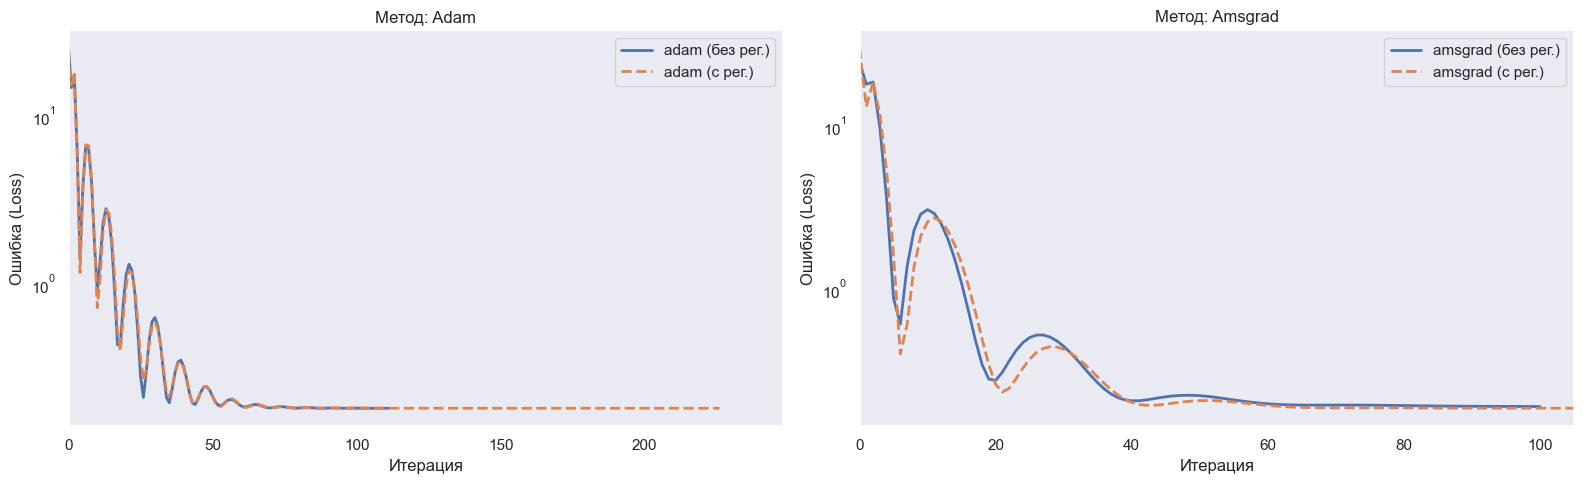

In [58]:
methods = ['adam', 'amsgrad']
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for i, descent_name in enumerate(methods):
    ax = axes[i] 
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'dimension': train.shape[1],
            'lambda_': best_lambdas_reg_adam[descent_name][0],
        }
    }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter=1000
    )
    regression.fit(train, y_train)
    ax.plot(regression.loss_history, label=f"{descent_name} (без рег.)", linestyle='-', linewidth=2)


    descent_config = {
        'descent_name': descent_name,
        'regularized': True,
        'kwargs': {
            'dimension': train.shape[1],
            'lambda_': best_lambdas_reg_adam[descent_name][0],
            'mu': best_lambdas_reg_adam[descent_name][1]
        }
    }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter=1000
    )
    regression.fit(train, y_train)
    ax.plot(regression.loss_history, label=f"{descent_name} (с рег.)", linestyle='--', linewidth=2)

    ax.set_xlabel("Итерация")
    ax.set_ylabel("Ошибка (Loss)")
    ax.set_title(f"Метод: {descent_name.capitalize()}")
    ax.set_yscale('log')  
    ax.set_xlim(0, max(iteration_to_min_reg_adam[descent_name], iteration_to_min[descent_name]))
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

$$MAE$$

$$ \nabla L(w) = \frac{1}{\ell}d |Xw - y|$$
зная, что $|Xw - y| = (Xw-y)\ sign(Xw - y)$
имеем:
$$d |Xw - y| = d((Xw-y)\ sign(Xw - y))$$
\
$$d((Xw-y)\ sign(Xw - y)) = d(Xw - y) \ sign(Xw - y) + d (sign(Xw - y)) (Xw -y)$$
\
$$d(Xw - y) \ sign(Xw - y) + d (sign(Xw - y)) (Xw -y) = d(Xw - y) \ sign(XW - y)$$
\
$$d(Xw - y) \ sign(XW - y) = X^T \ sign(Xw - y)$$
\
$$ \nabla L(w) = \frac{1}{\ell} X^T \ sign(Xw-y)$$
\
\
$$Huber$$

$$
L(w) = \frac{1}{\ell}
\begin{cases} 
\frac{1}{2} (y - Xw)^T(y - Xw), & \text{если } |y - Xw| < \delta, \\
\delta (|y - Xw| - \frac{1}{2} \delta), & \text{если } |y -Xw| \geq \delta.
\end{cases}
$$

Тогда:

$$
\nabla L(w) = \frac{1}{\ell}
\begin{cases} 
\frac{1}{2} \nabla_w MSE, & \text{если } |y - Xw| < \delta, \\
\delta \nabla_w MAE, & \text{если } |y -Xw| \geq \delta.
\end{cases}
$$

$$
\nabla L(w) = \frac{1}{\ell}
\begin{cases} 
X^T(Xw -y), & \text{если } |y - Xw| < \delta, \\
\delta X^T \ sign(Xw - y), & \text{если } |y -Xw| \geq \delta.
\end{cases}
$$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [59]:
#найдем лучшую лямбду для каждого метода через mse, просто потому что так легче
lamdas = np.logspace(-3, 3, 30)
best_lambdas = {}
with tqdm(total=len(lamdas)*len(['full', 'stochastic', 'adam', 'momentum','amsgrad']), position=0, desc="Total progress") as pbar_total:
    for descent_name in ['full','stochastic','adam','momentum','amsgrad']:
        errors = {}
        for lamda in lamdas:
            descent_config = {
                'descent_name': descent_name,
                'kwargs': {
                    'dimension': train.shape[1],
                    'lambda_' : lamda,
                }
            }
            regression = LinearRegression(
                descent_config=descent_config,
                max_iter= 1000
            )
            regression.fit(valid,y_valid)
            errors[lamda] = regression.loss_history[-1]
            pbar_total.update(1)
        best_lambdas[descent_name] = min(errors, key = errors.get)

Total progress: 100%|████████████████████████████████████████████████████████████████| 150/150 [00:45<00:00,  3.31it/s]


In [60]:
best_lambdas_df = pd.DataFrame.from_dict(best_lambdas, orient="index", columns=["Best Lambda"])

best_lambdas_df

,Best Lambda
full,2.043360
stochastic,0.489390
adam,1.268961
momentum,2.043360
amsgrad,0.045204


In [61]:
with tqdm(total=len(['full', 'stochastic', 'adam', 'momentum','amsgrad']), position=0, desc="Total progress") as pbar_total:
    for descent_name in ['full','stochastic','adam','momentum','amsgrad']:
        descent_config = {
                'descent_name': descent_name,
                'kwargs': {
                    'dimension': train.shape[1],
                    'lambda_' : best_lambdas[descent_name],
                    'loss_function': LossFunction.MSE
                }
            }
        regression = LinearRegression(
             descent_config=descent_config,
             max_iter= 1000
        )
        regression.fit(train,y_train)
        print(f'R^2 метрика метода {descent_name} обученного на MSE {r2_score(y_test, regression.predict(test)):.4f}')
        
        descent_config['loss_function'] = LossFunction.LogCosh
        
        regression = LinearRegression(
             descent_config=descent_config,
             max_iter= 1000
        )
        regression.fit(train,y_train)
        print(f'R^2 метрика метода {descent_name} обученного на LogCoch {r2_score(y_test, regression.predict(test)):.4f}')
        
        descent_config['loss_function'] = LossFunction.MAE
        
        regression = LinearRegression(
             descent_config=descent_config,
             max_iter= 1000
        )
        regression.fit(train,y_train)
        print(f'R^2 метрика метода {descent_name} обученного на MAE {r2_score(y_test, regression.predict(test)):.4f}')
        
        descent_config['loss_function'] = LossFunction.Huber
        
        regression = LinearRegression(
             descent_config=descent_config,
             max_iter= 1000
        )
        regression.fit(train,y_train)
        print(f'R^2 метрика метода {descent_name} обученного на Huber {r2_score(y_test, regression.predict(test)):.4f}')
        time.sleep(1)
        pbar_total.update(1)


Total progress:   0%|                                                                            | 0/5 [00:00<?, ?it/s]

R^2 метрика метода full обученного на MSE 0.7735
R^2 метрика метода full обученного на LogCoch 0.5714
R^2 метрика метода full обученного на MAE 0.7904
R^2 метрика метода full обученного на Huber 0.7817


Total progress:  20%|█████████████▌                                                      | 1/5 [00:08<00:34,  8.70s/it]

R^2 метрика метода stochastic обученного на MSE 0.7261
R^2 метрика метода stochastic обученного на LogCoch 0.7214
R^2 метрика метода stochastic обученного на MAE 0.7294
R^2 метрика метода stochastic обученного на Huber 0.7154


Total progress:  40%|███████████████████████████▏                                        | 2/5 [00:11<00:15,  5.05s/it]

R^2 метрика метода adam обученного на MSE 0.8424
R^2 метрика метода adam обученного на LogCoch 0.8426
R^2 метрика метода adam обученного на MAE 0.8427
R^2 метрика метода adam обученного на Huber 0.8426


Total progress:  60%|████████████████████████████████████████▊                           | 3/5 [00:16<00:10,  5.29s/it]

R^2 метрика метода momentum обученного на MSE 0.6301
R^2 метрика метода momentum обученного на LogCoch 0.6535
R^2 метрика метода momentum обученного на MAE 0.6254
R^2 метрика метода momentum обученного на Huber 0.6604


Total progress:  80%|██████████████████████████████████████████████████████▍             | 4/5 [00:30<00:08,  8.70s/it]

R^2 метрика метода amsgrad обученного на MSE 0.8377
R^2 метрика метода amsgrad обученного на LogCoch 0.8368
R^2 метрика метода amsgrad обученного на MAE 0.8408
R^2 метрика метода amsgrad обученного на Huber 0.8401


Total progress: 100%|████████████████████████████████████████████████████████████████████| 5/5 [00:36<00:00,  7.22s/it]


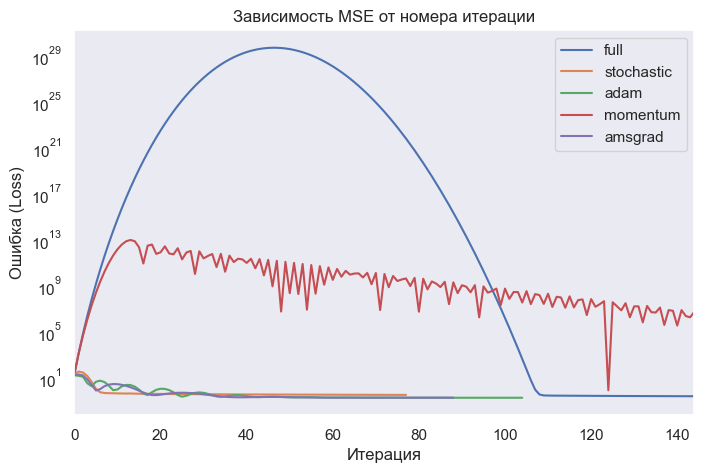

In [62]:
plt.figure(figsize=(8, 5))
iterations = {}
for descent_name in ['full','stochastic','adam','momentum','amsgrad']:
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': train.shape[1],
                'lambda_' : best_lambdas[descent_name],
                'loss_function': LossFunction.MSE
            }
        }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter= 1000
    )
    regression.fit(train,y_train)
    iterations[descent_name] = regression.count_iter
    plt.plot(regression.loss_history, label=descent_name)


plt.xlabel("Итерация")
plt.ylabel("Ошибка (Loss)")
plt.title("Зависимость MSE от номера итерации")
plt.yscale('log')
plt.xlim(0, sorted(iterations.values())[-2])
plt.legend()
plt.grid()
plt.show()


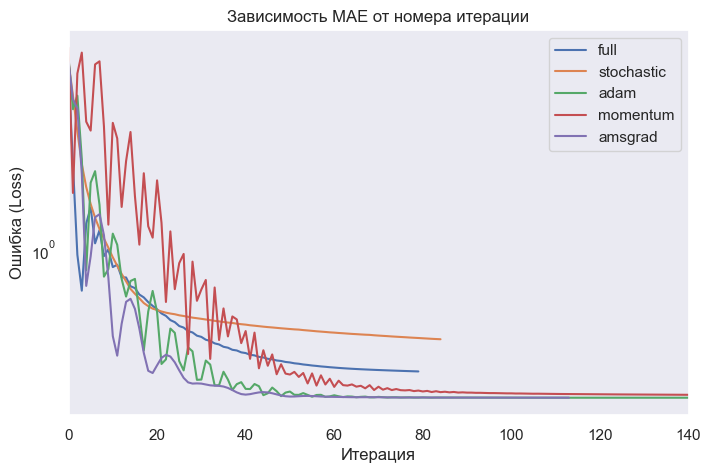

In [63]:
plt.figure(figsize=(8, 5))
iterations = {}
for descent_name in ['full','stochastic','adam','momentum','amsgrad']:
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': train.shape[1],
                'lambda_' : best_lambdas[descent_name],
                'loss_function': LossFunction.MAE
            }
        }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter= 1000
    )
    regression.fit(train,y_train)
    iterations[descent_name] = regression.count_iter
    plt.plot(regression.loss_history, label=descent_name)


plt.xlabel("Итерация")
plt.ylabel("Ошибка (Loss)")
plt.title("Зависимость MAE от номера итерации")
plt.yscale('log')
plt.xlim(0, sorted(iterations.values())[-2])
plt.legend()
plt.grid()
plt.show()


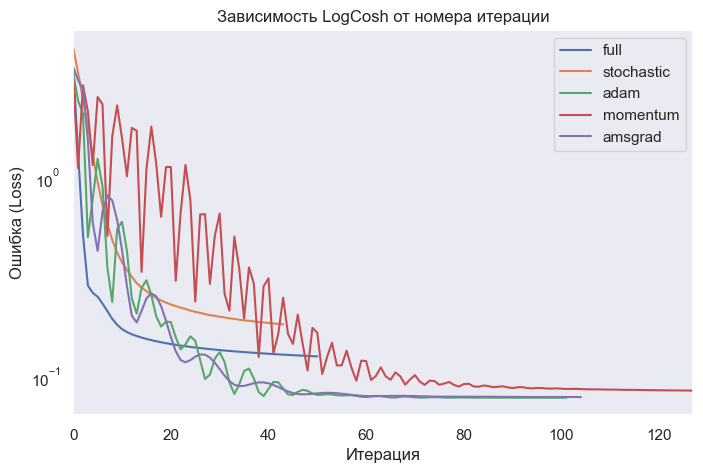

In [64]:
plt.figure(figsize=(8, 5))
iterations = {}
for descent_name in ['full','stochastic','adam','momentum','amsgrad']:
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': train.shape[1],
                'lambda_' : best_lambdas[descent_name],
                'loss_function': LossFunction.LogCosh
            }
        }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter= 1000
    )
    regression.fit(train,y_train)
    iterations[descent_name] = regression.count_iter
    plt.plot(regression.loss_history, label=descent_name)


plt.xlabel("Итерация")
plt.ylabel("Ошибка (Loss)")
plt.title("Зависимость LogCosh от номера итерации")
plt.yscale('log')
plt.xlim(0, sorted(iterations.values())[-1])
plt.legend()
plt.grid()
plt.show()


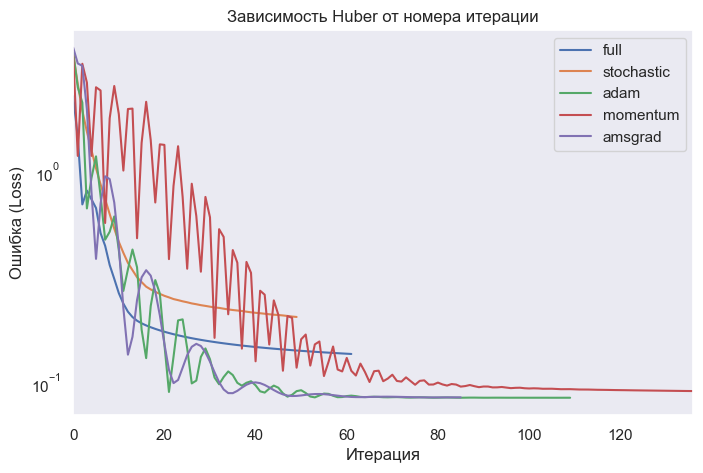

In [65]:
plt.figure(figsize=(8, 5))
iterations = {}
for descent_name in ['full','stochastic','adam','momentum','amsgrad']:
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': train.shape[1],
                'lambda_' : best_lambdas[descent_name],
                'loss_function': LossFunction.Huber
            }
        }
    regression = LinearRegression(
        descent_config=descent_config,
        max_iter= 1000
    )
    regression.fit(train,y_train)
    iterations[descent_name] = regression.count_iter
    plt.plot(regression.loss_history, label=descent_name)


plt.xlabel("Итерация")
plt.ylabel("Ошибка (Loss)")
plt.title("Зависимость Huber от номера итерации")
plt.yscale('log')
plt.xlim(0, sorted(iterations.values())[-1])
plt.legend()
plt.grid()
plt.show()
